# Quantum Teleportation
## theoretical aspect
let $\Psi$ be the qubit Quantum state of ALEX. ALEX wants to teleport her qubit state $\Psi$ to BOB. The problem is Alex do not know her own quantum state. If Alex go ahead and measure the message, she will collape in to either $| 1 \rangle$ or $| 0 \rangle$. One more important information is that Alex and BOB share an engtangle quantum qubit.

$| \Psi \rangle = a*|0\rangle +b* |1\rangle$ be the quantum state that ALEX does not know and she want to sent this quantum state to BOB.

The set up is as follow

1 : $| \Psi \rangle$---------------------------------

2 : $| 0 \rangle$---------------------------------

3 : $| 0 \rangle$---------------------------------



where the 2 qubit are engtangle

In [7]:
import qiskit as q
import matplotlib as mpl
#q.IBMQ.save_account("your_account.txt","r") this will save your IBM quantum computing account
q.IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-08-07 16:21:57,294: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [8]:
n_qubit=q.QuantumRegister(3)
n_classic=q.ClassicalRegister(3)
circuit= q.QuantumCircuit(n_qubit,n_classic)

In [9]:
circuit.h(1)
circuit.cnot(1,2)

In [10]:
circuit.cnot(0,1)
circuit.h(0)


In [11]:
circuit.measure([0,1],[0,1])

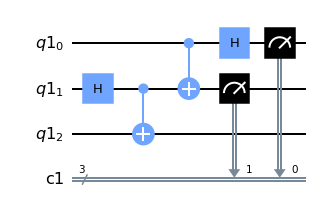

In [12]:
circuit.draw('mpl')

In [10]:
result= q.execute(circuit, backend= q.Aer.get_backend('ibmq_manila'), shots=1000).result()

QiskitBackendNotFoundError: 'No backend matches the criteria'